In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house_df = pd.read_csv('data/kc_house_data.csv')
to_drop = ['date', 'view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','id']
house_copy = house_df.copy()
house_copy.drop(to_drop, axis=1, inplace=True)
house_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


## Checking for missing values in the data

In [3]:
house_copy.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

Checking to the data type of waterfront and checkiing if it is categorical

In [4]:
house_copy['waterfront'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: waterfront
Non-Null Count  Dtype 
--------------  ----- 
19221 non-null  object
dtypes: object(1)
memory usage: 168.9+ KB


In [5]:
house_copy['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

Dropping the missing values in waterfront because the column is categorical

In [7]:
house_copy.dropna(subset=['waterfront'], axis=0, inplace=True)
house_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009


Checking if all missing values have been removed

In [8]:
house_copy.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

Creating dummies for one hot encoding 

In [9]:
dummy_list = ['waterfront', 'condition', 'grade']
dummies = pd.get_dummies(house_copy[dummy_list], drop_first=True).astype(int)
house_copy = pd.concat([house_copy, dummies], axis=1)
house_copy.drop(dummy_list, axis=1, inplace=True)
house_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,538000.0,3,2.25,2570,7242,2.0,1951,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,1933,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,1987,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1230000.0,4,4.50,5420,101930,1.0,2001,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,2008,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21592,360000.0,3,2.50,1530,1131,3.0,2009,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2.0,2014,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0.75,1020,1350,2.0,2009,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Modelling the current data

In [10]:
y = house_copy['price']
X = house_copy.drop('price', axis=1)

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:43:07   Log-Likelihood:            -2.6296e+05
No. Observations:               19221   AIC:                         5.260e+05
Df Residuals:                   19199   BIC:                         5.261e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.391e+06   1

In [15]:
print(f"p-value of F-statistic: {model.f_pvalue}")

p-value of F-statistic: 0.0


In [17]:
model.f_pvalue < 0.05

True

As seen by the p-value of the F-statistic, the model is of statistical signifance as the value is below the signficance level &alpha; of 0.05. The model has an adjusted R-squared of 0.67 which means the model explains 67% of variance of the price. But ther are issues with the model as it suffers from the following:

* The p-value of the Jarque-Bera test is below the significance level (&alpha; = 0.05), indicating strong evidence to reject the null hypothesis. The null hypothesis assumes that the residuals of the model are normally distributed. Since the p-value is less than &alpha;, we can conclude that the residuals are not normally distributed. This implies that the model may not accurately capture the true coefficients and the goodness of fit of the regression model may be compromised.
* The model exhibits multicollinearity, indicated by the large value of the condition number. Multicollinearity occurs when the independent variables in a regression model are highly correlated with each other. This correlation hinders the model's ability to accurately estimate the effects of individual variables, as changing one variable may not have the expected impact due to its high correlation with other variables.

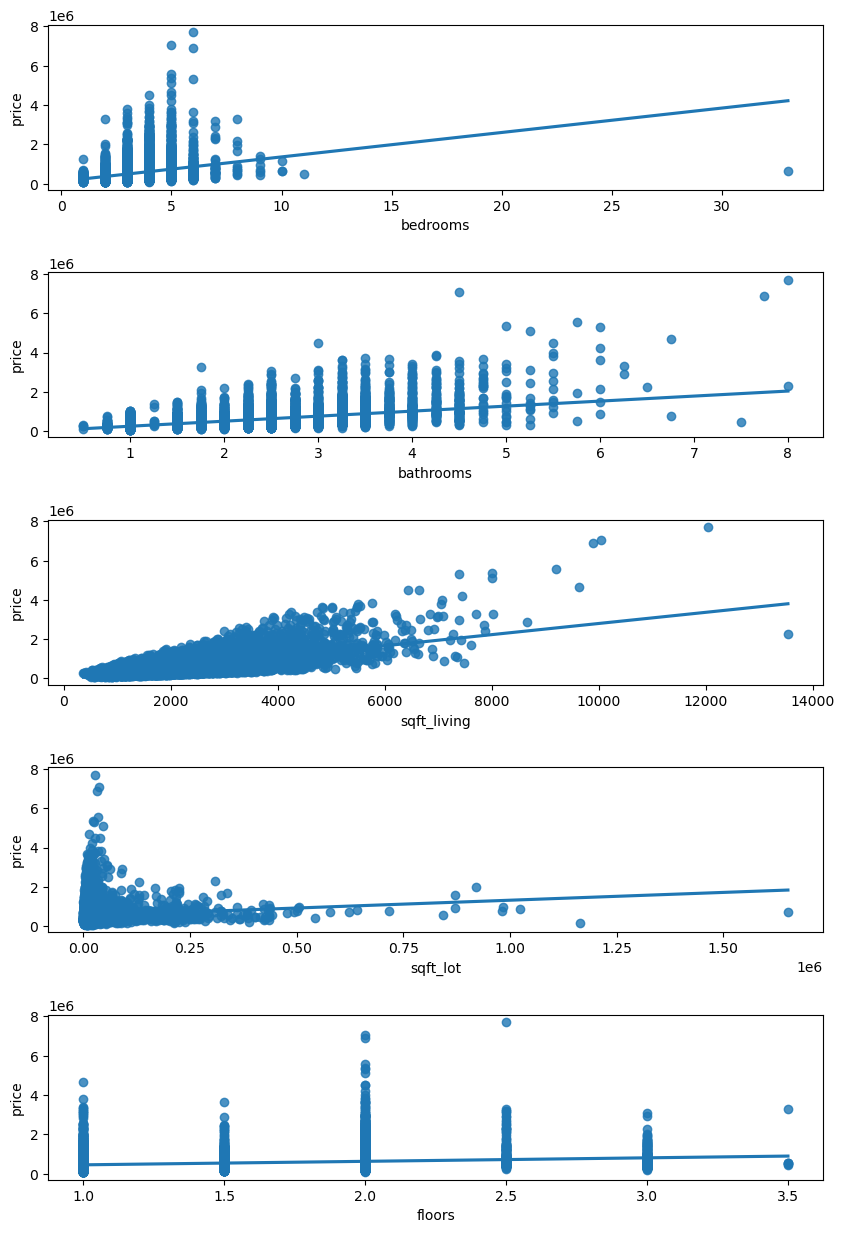

In [29]:
fig, ax = plt.subplots(nrows=5, figsize=(10,15))
sns.regplot(x=house_copy['bedrooms'], y=y, ci=None, ax=ax[0])
sns.regplot(x=house_copy['bathrooms'], y=y, ci=None, ax=ax[1])
sns.regplot(x=house_copy['sqft_living'], y=y, ci=None, ax=ax[2])
sns.regplot(x=house_copy['sqft_lot'], y=y, ci=None, ax=ax[3])
sns.regplot(x=house_copy['floors'], y=y, ci=None, ax=ax[4])

plt.subplots_adjust(hspace=0.5);  # Adjust the spacing between subplots;

As seen from the above graphs it is evident that the columns "bathrooms," "bedrooms," "sqft_living," and "sqft_lot" contain outliers that significantly deviate from the majority of the data points. These outliers have a detrimental impact on the model as they distort the interpretation of the coefficients.

The presence of extreme outliers in these variables can lead to misleading conclusions about their effects on the target variable. Outliers tend to have an undue influence on the regression analysis, affecting the estimation of coefficients and distorting the overall model fit.